In [16]:
import pandas as pd


In [17]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv', names=['label', 'text'])

In [18]:
df

,label,text
0,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer()

In [24]:
x = df['text']
y= df['label']

In [25]:
x_new = tfidf.fit_transform(x)

In [26]:
x.shape

(5573,)

In [27]:
x_new.shape

(5573, 8709)

In [9]:
from sklearn.model_selection import train_test_split


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [30]:
from sklearn.naive_bayes import GaussianNB



In [33]:
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [35]:
y_pred = nb.predict(x_test.toarray())

In [36]:
y_test.value_counts()

ham     1221
spam     173
Name: label, dtype: int64

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

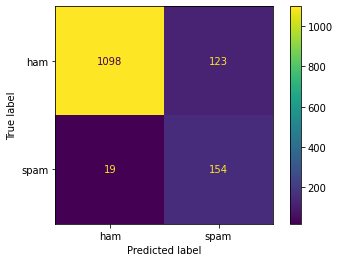

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
accuracy_score(y_test, y_pred)

0.8981348637015782

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.90      0.94      1221
        spam       0.56      0.89      0.68       173

    accuracy                           0.90      1394
   macro avg       0.77      0.89      0.81      1394
weighted avg       0.93      0.90      0.91      1394



In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rd = RandomForestClassifier()

In [47]:
rd.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rd.predict(x_test)

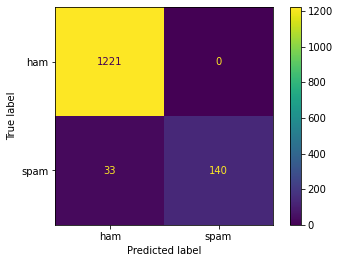

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [50]:
accuracy_score(y_test, y_pred)

0.9763271162123386

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1221
        spam       1.00      0.81      0.89       173

    accuracy                           0.98      1394
   macro avg       0.99      0.90      0.94      1394
weighted avg       0.98      0.98      0.98      1394



In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
li =  LogisticRegression()

In [54]:
li.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred = li.predict(x_test)

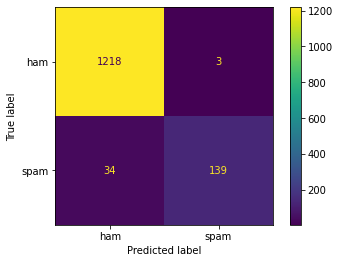

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [61]:
accuracy_score(y_test, y_pred)

0.9734576757532282

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1221
        spam       0.98      0.80      0.88       173

    accuracy                           0.97      1394
   macro avg       0.98      0.90      0.93      1394
weighted avg       0.97      0.97      0.97      1394

